In [1]:
from training_utilities import *
from variables_to_specify_oil import *

In [2]:
from darts.models import ExponentialSmoothing
import pandas as pd

In [3]:
df, columns_to_normalize, target_col, forecast_avg_target_col_name, avg_target_col_name, No_of_datapoints_in_one_day, start_date, end_date, delta, one_month_days, out_columns, drop_columnss, windows, index_of_one_month, one_month_window_size, date_col_name = variables_to_specify_oil()


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Apply the scaler to the specified columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df

component                date      HUFL      HULL      MUFL      MULL  \
0         2016-07-01 00:00:00  0.615599  0.454943  0.628980  0.467510   
1         2016-07-01 01:00:00  0.612708  0.459449  0.626458  0.464878   
2         2016-07-01 02:00:00  0.601143  0.436920  0.621438  0.459689   
3         2016-07-01 03:00:00  0.599698  0.450437  0.621438  0.462320   
4         2016-07-01 04:00:00  0.605480  0.450437  0.626458  0.467510   
...                       ...       ...       ...       ...       ...   
17395     2018-06-25 19:00:00  0.695081  0.509011  0.737019  0.529859   
17396     2018-06-25 20:00:00  0.770227  0.554069  0.790615  0.553249   
17397     2018-06-25 21:00:00  0.758662  0.572091  0.793137  0.589577   
17398     2018-06-25 22:00:00  0.784682  0.657633  0.828301  0.706454   
17399     2018-06-25 23:00:00  0.825135  0.716207  0.868510  0.680506   

component      LUFL      LULL        OT  
0          0.556576  0.613765  0.691018  
1          0.550279  0.620783  0.636233  
2          0.512595  0.586144  0.636233  
3          0.515693  0.599955  0.581468  
4          0.521990  0.599955  0.519656  
...             ...       ...       ...  
17395      0.465414  0.558750  0.292132  
17396      0.581767  0.593163  0.280891  
17397      0.544084  0.551732  0.280891  
17398      0.512595  0.586144  0.272466  
17399      0.474809  0.579352  0.269651  

[17400 rows x 8 columns]

In [5]:
convert_time(df, date_col_name)

component                date      HUFL      HULL      MUFL      MULL  \
0         2016-07-01 00:00:00  0.615599  0.454943  0.628980  0.467510   
1         2016-07-01 01:00:00  0.612708  0.459449  0.626458  0.464878   
2         2016-07-01 02:00:00  0.601143  0.436920  0.621438  0.459689   
3         2016-07-01 03:00:00  0.599698  0.450437  0.621438  0.462320   
4         2016-07-01 04:00:00  0.605480  0.450437  0.626458  0.467510   
...                       ...       ...       ...       ...       ...   
17395     2018-06-25 19:00:00  0.695081  0.509011  0.737019  0.529859   
17396     2018-06-25 20:00:00  0.770227  0.554069  0.790615  0.553249   
17397     2018-06-25 21:00:00  0.758662  0.572091  0.793137  0.589577   
17398     2018-06-25 22:00:00  0.784682  0.657633  0.828301  0.706454   
17399     2018-06-25 23:00:00  0.825135  0.716207  0.868510  0.680506   

component      LUFL      LULL        OT  year  month  day  hour  minute  
0          0.556576  0.613765  0.691018  2016      7    1     0       0  
1          0.550279  0.620783  0.636233  2016      7    1     1       0  
2          0.512595  0.586144  0.636233  2016      7    1     2       0  
3          0.515693  0.599955  0.581468  2016      7    1     3       0  
4          0.521990  0.599955  0.519656  2016      7    1     4       0  
...             ...       ...       ...   ...    ...  ...   ...     ...  
17395      0.465414  0.558750  0.292132  2018      6   25    19       0  
17396      0.581767  0.593163  0.280891  2018      6   25    20       0  
17397      0.544084  0.551732  0.280891  2018      6   25    21       0  
17398      0.512595  0.586144  0.272466  2018      6   25    22       0  
17399      0.474809  0.579352  0.269651  2018      6   25    23       0  

[17400 rows x 13 columns]

In [6]:
# compute daily average
# 24 datapoints in each day
daily_avg =[]
for i in range (0, len(df),No_of_datapoints_in_one_day):
  sub_df = df[i:i+No_of_datapoints_in_one_day]
  mean = sub_df[target_col].mean()
  daily_avg.append(mean)
daily_df_avg = pd.DataFrame(daily_avg, columns=[avg_target_col_name])
daily_df_avg

OT_avg
0    0.502163
1    0.521477
2    0.613061
3    0.623768
4    0.682464
..        ...
720  0.257781
721  0.203007
722  0.222201
723  0.245608
724  0.285402

[725 rows x 1 columns]

In [7]:
daily_df_avg.iloc[:, 1:]

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[725 rows x 0 columns]

In [8]:
dates_list = []
year_ls = []
month_ls = []
day_ls = []

while start_date <= end_date:
    date  = start_date.strftime("%Y-%m-%d")
    year, month, day = date.split('-')
    year_ls.append(int(year))
    month_ls.append(int(month))
    day_ls.append(int(day))
    # dates_list.append(date)
    start_date += delta

In [9]:
# daily_df_avg.drop(daily_df_avg.index[-1], inplace=True)
daily_df_avg['year'] = year_ls
daily_df_avg['month'] = month_ls
daily_df_avg['day'] = day_ls

In [10]:
# create seperate dataframe for each year in the dataset
years_ls = [2016, 2017, 2018]
index_ls = []
for year in (years_ls):
    if year == 2016:
        row_index = 0
    else:
        index = (daily_df_avg['year'] == year) & (daily_df_avg['month'] == 1) & (daily_df_avg['day'] == 1)
        row_index = index[index].index[0]
    index_ls.append(row_index)
index_ls.append(len(daily_df_avg))
print(index_ls)

years_df_ls = []
for i in range(0,len(index_ls)-1):
  one_year_df = daily_df_avg[index_ls[i]:index_ls[i+1]]
  years_df_ls.append(one_year_df)

print(len(years_df_ls))
# years_df_ls[0]


[0, 184, 549, 725]
3


In [11]:
years_df_ls[0]

OT_avg  year  month  day
0    0.502163  2016      7    1
1    0.521477  2016      7    2
2    0.613061  2016      7    3
3    0.623768  2016      7    4
4    0.682464  2016      7    5
..        ...   ...    ...  ...
179  0.235428  2016     12   27
180  0.231036  2016     12   28
181  0.244438  2016     12   29
182  0.253218  2016     12   30
183  0.299159  2016     12   31

[184 rows x 4 columns]

In [12]:
years_df_ls[1]

OT_avg  year  month  day
184  0.321510  2017      1    1
185  0.339652  2017      1    2
186  0.323559  2017      1    3
187  0.306997  2017      1    4
188  0.190247  2017      1    5
..        ...   ...    ...  ...
544  0.140271  2017     12   27
545  0.186445  2017     12   28
546  0.220153  2017     12   29
547  0.165844  2017     12   30
548  0.165732  2017     12   31

[365 rows x 4 columns]

In [13]:
years_df_ls[2]

OT_avg  year  month  day
549  0.159290  2018      1    1
550  0.176378  2018      1    2
551  0.082161  2018      1    3
552  0.037862  2018      1    4
553  0.111597  2018      1    5
..        ...   ...    ...  ...
720  0.257781  2018      6   21
721  0.203007  2018      6   22
722  0.222201  2018      6   23
723  0.245608  2018      6   24
724  0.285402  2018      6   25

[176 rows x 4 columns]

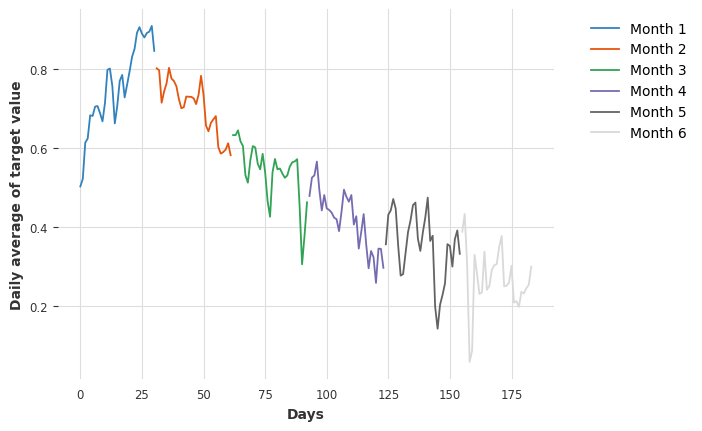

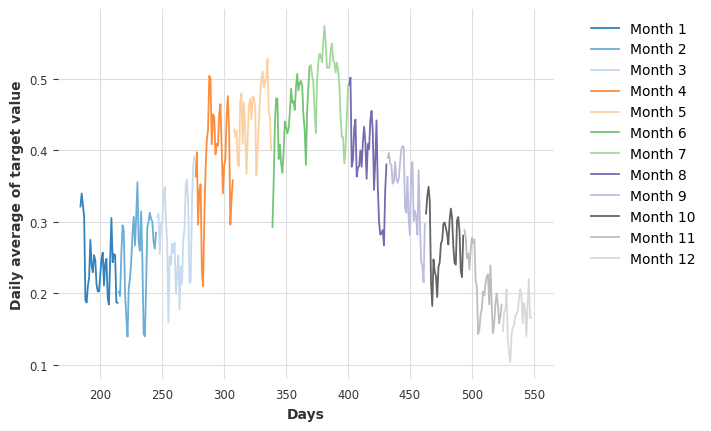

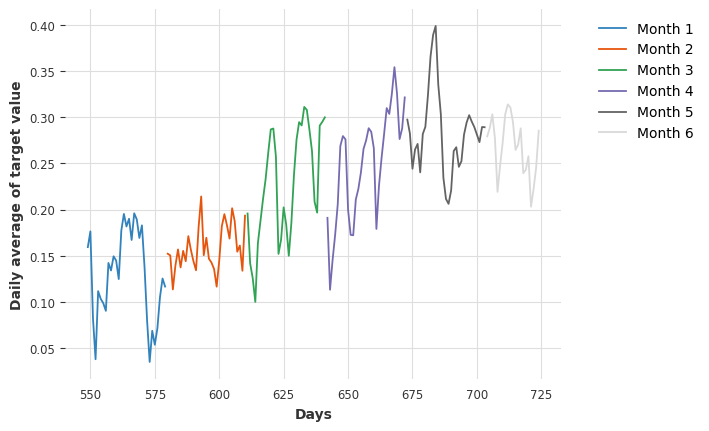

In [14]:
index = 0
for daily_df_avg2 in years_df_ls:
    plot_months_patterns(daily_df_avg2, one_month_days, avg_target_col_name, index)
    index+=1

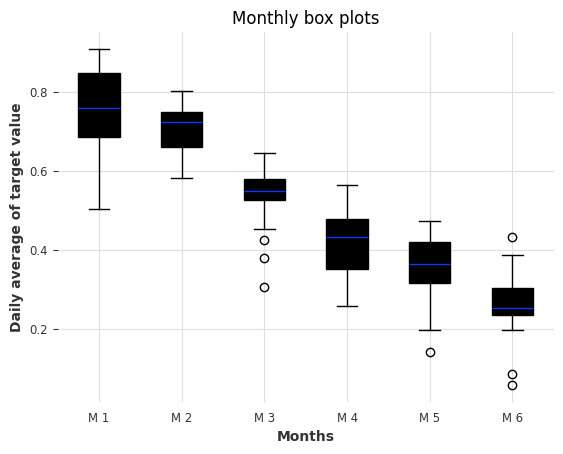

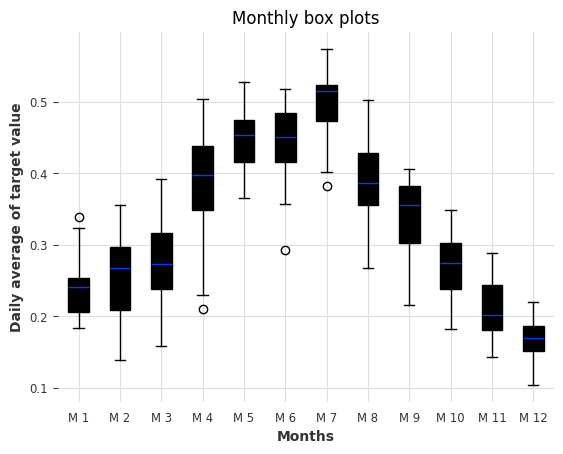

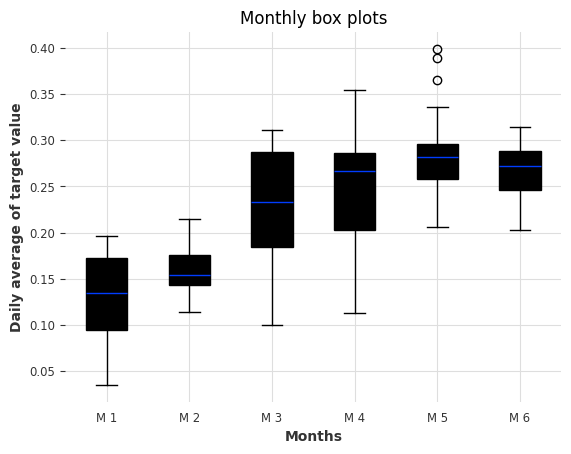

In [15]:
index = 0
for daily_df_avg2 in years_df_ls:
    plot_months_patterns_box(daily_df_avg2, one_month_days, avg_target_col_name, index)
    index+=1

In [16]:
daily_df_avg

OT_avg  year  month  day
0    0.502163  2016      7    1
1    0.521477  2016      7    2
2    0.613061  2016      7    3
3    0.623768  2016      7    4
4    0.682464  2016      7    5
..        ...   ...    ...  ...
720  0.257781  2018      6   21
721  0.203007  2018      6   22
722  0.222201  2018      6   23
723  0.245608  2018      6   24
724  0.285402  2018      6   25

[725 rows x 4 columns]

# Forecasting

In [17]:
ls_forecast_time = []

for b in range (0, len(daily_df_avg),one_month_days): 
    if b ==0:
        forecast_daily_avg = daily_df_avg[0:one_month_days]
        
        forecast_daily_avg = forecast_daily_avg.rename(columns={avg_target_col_name: forecast_avg_target_col_name})
        
        forecast_daily_avg1= forecast_daily_avg
        # start_forecasting_time = timeit.default_timer()
    else:
        forecast_daily_avg, forecast_time = forecast_es(daily_df_avg[0:b][avg_target_col_name], daily_df_avg[b:b+one_month_days][avg_target_col_name], forecast_daily_avg, forecast_avg_target_col_name)
        ls_forecast_time.append(forecast_time)
# end_forecasting_time = timeit.default_timer()
# forecasting_time = end_forecasting_time - start_forecasting_time
forecasting_time = sum(ls_forecast_time)
print("forecasting time is: ", forecasting_time)

# end_forecasting_time = timeit.default_timer()
# forecasting_time = end_forecasting_time - start_forecasting_time
# print("forecasting time is: ", forecasting_time)

forecast_daily_avg = forecast_daily_avg.drop(columns = ['year', 'month', 'day'])
forecast_daily_avg = pd.concat([forecast_daily_avg, daily_df_avg.iloc[:, 1:]], axis=1)
# 
# # print(forecast_daily_avg.iloc[61,3])
forecast_daily_avg

forecasting time is:  0.3306693739999993


forecast_OT_avg  year  month  day
0           0.502163  2016      7    1
1           0.521477  2016      7    2
2           0.613061  2016      7    3
3           0.623768  2016      7    4
4           0.682464  2016      7    5
..               ...   ...    ...  ...
720         0.317364  2018      6   21
721         0.314537  2018      6   22
722         0.307535  2018      6   23
723         0.304765  2018      6   24
724         0.313844  2018      6   25

[725 rows x 4 columns]

In [18]:
total_error = mean_squared_error(daily_df_avg[avg_target_col_name], forecast_daily_avg[forecast_avg_target_col_name])
print("total forecasting error is: ",total_error)

total forecasting error is:  0.007734942880200888


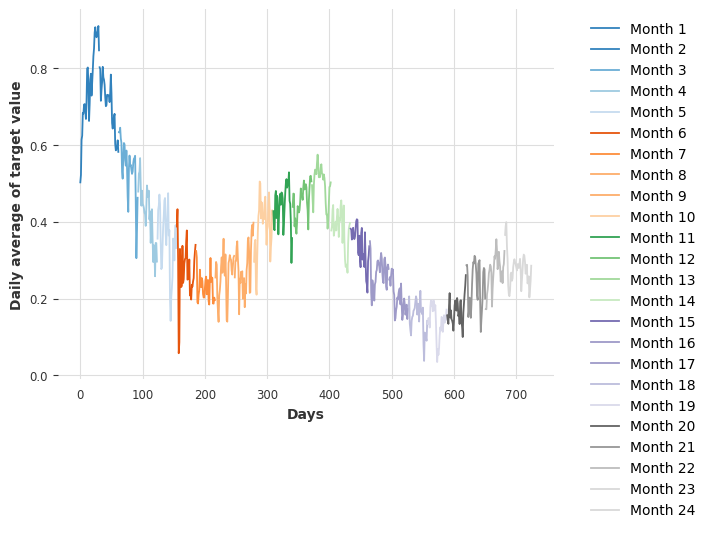

In [19]:
plot_months_patterns(daily_df_avg, one_month_days, avg_target_col_name, 0)


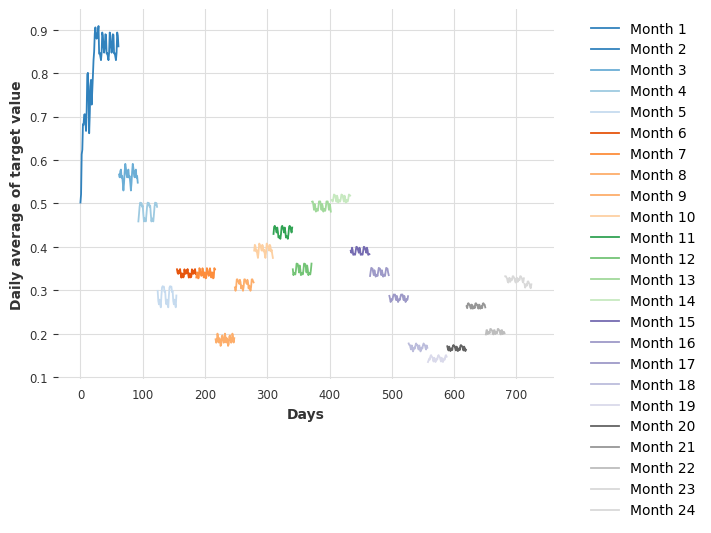

In [20]:
plot_months_patterns(forecast_daily_avg, one_month_days, forecast_avg_target_col_name, 0)

# compute similarity

In [21]:
daily_data_for_each_month = make_daily_data_for_each_month(daily_df_avg, avg_target_col_name, one_month_days)
daily_data_for_each_month

month_0   month_1   month_2   month_3   month_4   month_5   month_6  \
0   0.502163  0.801496  0.632433  0.462135  0.296171  0.390916  0.321510   
1   0.521477  0.796347  0.632078  0.478171  0.355806  0.331635  0.339652   
2   0.613061  0.714301  0.644311  0.524579  0.430710  0.387522  0.323559   
3   0.623768  0.742567  0.616571  0.530313  0.441828  0.432348  0.306997   
4   0.682464  0.763284  0.604575  0.565250  0.470446  0.302142  0.190247   
5   0.680829  0.802552  0.530778  0.493737  0.445867  0.057873  0.187089   
6   0.704470  0.775397  0.511819  0.441477  0.352234  0.086491  0.210380   
7   0.705757  0.769136  0.568468  0.480451  0.276509  0.329061  0.222025   
8   0.687733  0.755792  0.604518  0.446744  0.280252  0.280311  0.274927   
9   0.667073  0.723547  0.601121  0.442765  0.333683  0.229924  0.239641   
10  0.713304  0.700258  0.559866  0.435919  0.386881  0.233964  0.229571   
11  0.797458  0.703008  0.545468  0.423335  0.415845  0.337077  0.253334   
12  0.800970  0.729984  0.584912  0.419239  0.454820  0.240575  0.245784   
13  0.756025  0.729341  0.538740  0.389041  0.461432  0.249883  0.212019   
14  0.661866  0.729106  0.465413  0.437731  0.370141  0.290787  0.202771   
15  0.706752  0.725416  0.425501  0.494087  0.339008  0.302549  0.202713   
16  0.769660  0.710849  0.537628  0.476005  0.385180  0.305535  0.226473   
17  0.784642  0.734901  0.571862  0.463773  0.423395  0.349541  0.248535   
18  0.727759  0.782419  0.545586  0.480453  0.474015  0.377105  0.256964   
19  0.760415  0.734609  0.547750  0.405721  0.364171  0.249179  0.211079   
20  0.793830  0.656365  0.534995  0.426848  0.377456  0.250992  0.241746   
21  0.830350  0.641970  0.524226  0.344803  0.197738  0.258774  0.248418   
22  0.850186  0.663327  0.530135  0.386527  0.141910  0.301495  0.193408   
23  0.891442  0.672167  0.552316  0.432289  0.202830  0.208098  0.184339   
24  0.905662  0.680359  0.563376  0.356915  0.227408  0.211786  0.248475   
25  0.889396  0.601998  0.565602  0.294998  0.256610  0.197329  0.305474   
26  0.879503  0.585382  0.571274  0.338831  0.356095  0.235428  0.243503   
27  0.890917  0.589299  0.451483  0.323089  0.351473  0.231036  0.254795   
28  0.894252  0.595679  0.305064  0.257956  0.299216  0.244438  0.253509   
29  0.908764  0.611597  0.378161  0.344803  0.368559  0.253218  0.187204   
30  0.845509  0.581468  0.462135  0.344101  0.390916  0.299159  0.186795   

     month_7   month_8   month_9  ...  month_13  month_14  month_15  month_16  \
0   0.202420  0.272705  0.325082  ...  0.418596  0.283647  0.372425  0.302371   
1   0.196102  0.262345  0.377046  ...  0.381787  0.288448  0.302607  0.306763   
2   0.254738  0.284992  0.391560  ...  0.401860  0.267144  0.245314  0.286749   
3   0.295233  0.306821  0.363645  ...  0.445810  0.343161  0.237533  0.231975   
4   0.288035  0.310976  0.397352  ...  0.490225  0.380501  0.215472  0.222669   
5   0.200606  0.255030  0.295879  ...  0.492041  0.389570  0.296814  0.280780   
6   0.166724  0.298044  0.343748  ...  0.502046  0.396360  0.311561  0.288505   
7   0.139452  0.298218  0.352643  ...  0.377046  0.381672  0.336084  0.277327   
8   0.208100  0.334853  0.230568  ...  0.386937  0.379327  0.349133  0.249296   
9   0.221618  0.348839  0.210085  ...  0.431003  0.353462  0.329293  0.255792   
10  0.244904  0.302960  0.304830  ...  0.443290  0.356098  0.215355  0.233262   
11  0.283061  0.272586  0.372248  ...  0.363351  0.383894  0.182349  0.260004   
12  0.307111  0.159114  0.414618  ...  0.375407  0.360369  0.247424  0.277737   
13  0.267028  0.251636  0.429187  ...  0.378333  0.354691  0.230980  0.270246   
14  0.306587  0.240109  0.504330  ...  0.400046  0.360484  0.223603  0.275571   
15  0.355509  0.269545  0.499708  ...  0.377162  0.382316  0.194756  0.218746   
16  0.272879  0.257549  0.408588  ...  0.412566  0.401215  0.236830  0.209324   
17  0.259418  0.270946  0.450373  ...  0.433167  0.406190  0.243208  0.142963   
18  0.314722  0.199494  0.446570 

In [22]:
filtered_wess_similarity_dictionary = wasserstein_dist(daily_data_for_each_month)
new_filtered_wess_similarity_dictionary = convert_sim_to_month(filtered_wess_similarity_dictionary,3 )


column is :  month_0
column is :  month_1


column is :  month_2


column is :  month_3


column is :  month_4


column is :  month_5


column is :  month_6


column is :  month_7


column is :  month_8


column is :  month_9


column is :  month_10


column is :  month_11


column is :  month_12


column is :  month_13


column is :  month_14


column is :  month_15


column is :  month_16


column is :  month_17


column is :  month_18


column is :  month_19


column is :  month_20


column is :  month_21


column is :  month_22


{9: 3, 10: 3, 12: 2, 13: 9, 14: 4, 15: 8, 16: 6, 19: 17, 20: 16, 21: 7, 22: 15}
wess_similarity_time is:  0.052401542000000134
dictionary_1 is:  {10: 4, 11: 4, 13: 3, 14: 10, 15: 5, 16: 9, 17: 7, 20: 18, 21: 17, 22: 8, 23: 16}


final_similarities are:  {'M4, 2017': 'M10, 2016', 'M5, 2017': 'M10, 2016', 'M7, 2017': 'M9, 2016', 'M8, 2017': 'M4, 2017', 'M9, 2017': 'M11, 2016', 'M10, 2017': 'M3, 2017', 'M11, 2017': 'M1, 2017', 'M2, 2018': 'M12, 2017', 'M3, 20

In [23]:
filtered_tvd_similarity_dictionary = tvd(daily_data_for_each_month)
new_filtered_tvd_similarity_dictionary = convert_sim_to_month(filtered_tvd_similarity_dictionary, 3)


tvd_similarity_time is : 0.0023273750000001314
{8: 6, 9: 4, 13: 3, 15: 8, 16: 6, 19: 17, 20: 7, 21: 6, 22: 7}
dictionary_1 is:  {9: 7, 10: 5, 14: 4, 16: 9, 17: 7, 20: 18, 21: 8, 22: 7, 23: 8}


final_similarities are:  {'M3, 2017': 'M1, 2017', 'M4, 2017': 'M11, 2016', 'M8, 2017': 'M10, 2016', 'M10, 2017': 'M3, 2017', 'M11, 2017': 'M1, 2017', 'M2, 2018': 'M12, 2017', 'M3, 2018': 'M2, 2017', 'M4, 2018': 'M1, 2017', 'M5, 2018': 'M2, 2017'}


In [24]:
for idx, (pair_A, pair_B) in enumerate(zip_longest(new_filtered_wess_similarity_dictionary.items(), new_filtered_tvd_similarity_dictionary.items()), start=1):
    key_A, value_A = pair_A
    if pair_B is not None:
        key_B, value_B = pair_B
    else:
        key_B, value_B = 'none', 'none'
    
    print(f"{idx} & {key_A} & {value_A} & {key_B} & {value_B} \\\\")
    print("\\hline")

1 & M4, 2017 & M10, 2016 & M3, 2017 & M1, 2017 \\
\hline
2 & M5, 2017 & M10, 2016 & M4, 2017 & M11, 2016 \\
\hline
3 & M7, 2017 & M9, 2016 & M8, 2017 & M10, 2016 \\
\hline
4 & M8, 2017 & M4, 2017 & M10, 2017 & M3, 2017 \\
\hline
5 & M9, 2017 & M11, 2016 & M11, 2017 & M1, 2017 \\
\hline
6 & M10, 2017 & M3, 2017 & M2, 2018 & M12, 2017 \\
\hline
7 & M11, 2017 & M1, 2017 & M3, 2018 & M2, 2017 \\
\hline
8 & M2, 2018 & M12, 2017 & M4, 2018 & M1, 2017 \\
\hline
9 & M3, 2018 & M11, 2017 & M5, 2018 & M2, 2017 \\
\hline
10 & M4, 2018 & M2, 2017 & none & none \\
\hline
11 & M5, 2018 & M10, 2017 & none & none \\
\hline


In [25]:
forecasted_daily_data_for_each_month = make_daily_data_for_each_month(forecast_daily_avg, forecast_avg_target_col_name, one_month_days)

In [26]:
forecasted_daily_data_for_each_month

month_0   month_1   month_2   month_3   month_4   month_5   month_6  \
0   0.502163  0.846571  0.566683  0.547930  0.492323  0.260817  0.349028   
1   0.521477  0.838213  0.560269  0.458686  0.298772  0.288044  0.337424   
2   0.613061  0.830117  0.574449  0.475482  0.275689  0.348462  0.329606   
3   0.623768  0.847185  0.578137  0.493229  0.267692  0.340135  0.341190   
4   0.682464  0.893911  0.559657  0.502016  0.278580  0.337842  0.340927   
5   0.680829  0.886715  0.563168  0.496516  0.269223  0.345741  0.327537   
6   0.704470  0.861959  0.547930  0.500936  0.260817  0.339878  0.328856   
7   0.705757  0.847307  0.529842  0.492323  0.288044  0.349028  0.351156   
8   0.687733  0.858853  0.547276  0.495146  0.306638  0.337424  0.348009   
9   0.667073  0.889762  0.573390  0.474982  0.309486  0.329187  0.339000   
10  0.713304  0.888427  0.591302  0.458582  0.307277  0.339002  0.333304   
11  0.797458  0.845509  0.581468  0.465864  0.308577  0.337940  0.334936   
12  0.800970  0.846571  0.566683  0.462135  0.296171  0.329671  0.350896   
13  0.756025  0.838213  0.560269  0.458686  0.298772  0.331635  0.339652   
14  0.661866  0.830117  0.574449  0.475482  0.275689  0.348462  0.329606   
15  0.706752  0.847185  0.578137  0.493229  0.267692  0.340135  0.341190   
16  0.769660  0.893911  0.559657  0.502016  0.278580  0.337842  0.340927   
17  0.784642  0.886715  0.563168  0.496516  0.269223  0.345741  0.327537   
18  0.727759  0.861959  0.547930  0.500936  0.260817  0.339878  0.328856   
19  0.760415  0.847307  0.529842  0.492323  0.288044  0.349028  0.351156   
20  0.793830  0.858853  0.547276  0.495146  0.306638  0.337424  0.348009   
21  0.830350  0.889762  0.573390  0.474982  0.309486  0.329187  0.339000   
22  0.850186  0.888427  0.591302  0.458582  0.307277  0.339002  0.333304   
23  0.891442  0.845509  0.581468  0.465864  0.308577  0.337940  0.334936   
24  0.905662  0.846571  0.566683  0.462135  0.296171  0.329671  0.350896   
25  0.889396  0.838213  0.560269  0.458686  0.298772  0.331635  0.339652   
26  0.879503  0.830117  0.574449  0.475482  0.275689  0.348462  0.329606   
27  0.890917  0.847185  0.578137  0.493229  0.267692  0.340135  0.341190   
28  0.894252  0.893911  0.559657  0.502016  0.278580  0.337842  0.340927   
29  0.908764  0.886715  0.563168  0.496516  0.269223  0.345741  0.327537   
30  0.845509  0.861959  0.547930  0.500936  0.260817  0.339878  0.328856   

     month_7   month_8   month_9  ...  month_13  month_14  month_15  month_16  \
0   0.351156  0.182272  0.307691  ...  0.504267  0.507966  0.396359  0.336084   
1   0.348009  0.200340  0.325152  ...  0.504871  0.506578  0.391166  0.332961   
2   0.187187  0.192287  0.325352  ...  0.496119  0.504399  0.386448  0.342867   
3   0.179290  0.179746  0.321481  ...  0.485308  0.510366  0.398191  0.351735   
4   0.182272  0.189810  0.318302  ...  0.498969  0.520740  0.393122  0.350575   
5   0.200340  0.306671  0.391475  ...  0.493316  0.519871  0.381665  0.349929   
6   0.192287  0.298906  0.404808  ...  0.481293  0.518172  0.382516  0.340912   
7   0.179746  0.307691  0.401753  ...  0.507966  0.391166  0.383300  0.334980   
8   0.189810  0.325152  0.389659  ...  0.506578  0.386448  0.332961  0.287243   
9   0.185055  0.325352  0.393355  ...  0.504399  0.398191  0.342867  0.281111   
10  0.171956  0.321481  0.382772  ...  0.510366  0.393122  0.351735  0.273047   
11  0.175503  0.318302  0.374588  ...  0.520740  0.381665  0.350575  0.276560   
12  0.193785  0.314720  0.387736  ...  0.519871  0.382516  0.349929  0.279879   
13  0.196102  0.324352  0.407724  ...  0.518172  0.383300  0.340912  0.278104   
14  0.187187  0.319055  0.405602  ...  0.510507  0.382014  0.334980  0.286468   
15  0.179290  0.304326  0.401307  ...  0.504270  0.391327  0.346328  0.290517   
16  0.182272  0.310976  0.397352  ...  0.518047  0.400347  0.339658  0.288344   
17  0.200340  0.306671  0.391475  ...  0.513248  0.399581  0.331489  0.290442   
18  0.192287  0.298906  0.404808 

In [27]:
# forecasted_filtered_wess_similarity_dictionary = wasserstein_dist(forecasted_daily_data_for_each_month)
forecasted_filtered_wess_similarity_dictionary = wasserstein_dist_forecasted(forecasted_daily_data_for_each_month, daily_data_for_each_month)
new_forecasted_filtered_wess_similarity_dictionary = convert_sim_to_month(
    forecasted_filtered_wess_similarity_dictionary,3)


{6: 4, 9: 3, 10: 3, 11: 4, 19: 17, 20: 16, 21: 16, 22: 15}
wess_similarity_time is:  0.032419040999999815
dictionary_1 is:  {7: 5, 10: 4, 11: 4, 12: 5, 20: 18, 21: 17, 22: 17, 23: 16}


final_similarities are:  {'M1, 2017': 'M11, 2016', 'M4, 2017': 'M10, 2016', 'M5, 2017': 'M10, 2016', 'M6, 2017': 'M11, 2016', 'M2, 2018': 'M12, 2017', 'M3, 2018': 'M11, 2017', 'M4, 2018': 'M11, 2017', 'M5, 2018': 'M10, 2017'}


In [28]:
# forecasted_filtered_tvd_similarity_dictionary = tvd(forecasted_daily_data_for_each_month)
forecasted_filtered_tvd_similarity_dictionary = tvd_forecasted(forecasted_daily_data_for_each_month, daily_data_for_each_month)
new_forecasted_filtered_tvd_similarity_dictionary = convert_sim_to_month(forecasted_filtered_tvd_similarity_dictionary, 3)


tvd_similarity_time is : 0.0023675420000000003
{6: 4, 9: 4, 11: 4, 12: 10, 19: 17, 20: 7, 21: 16, 22: 7}
dictionary_1 is:  {7: 5, 10: 5, 12: 5, 13: 11, 20: 18, 21: 8, 22: 17, 23: 8}


final_similarities are:  {'M1, 2017': 'M11, 2016', 'M4, 2017': 'M11, 2016', 'M6, 2017': 'M11, 2016', 'M7, 2017': 'M5, 2017', 'M2, 2018': 'M12, 2017', 'M3, 2018': 'M2, 2017', 'M4, 2018': 'M11, 2017', 'M5, 2018': 'M2, 2017'}


In [29]:
for idx, (pair_A, pair_B) in enumerate(zip_longest(new_forecasted_filtered_wess_similarity_dictionary.items(), new_forecasted_filtered_tvd_similarity_dictionary.items()), start=1):
    key_A, value_A = pair_A
    if pair_B is not None:
        key_B, value_B = pair_B
    else:
        key_B, value_B = 'none', 'none'
    
    print(f"{idx} & {key_A} & {value_A} & {key_B} & {value_B} \\\\")
    print("\\hline")

1 & M1, 2017 & M11, 2016 & M1, 2017 & M11, 2016 \\
\hline
2 & M4, 2017 & M10, 2016 & M4, 2017 & M11, 2016 \\
\hline
3 & M5, 2017 & M10, 2016 & M6, 2017 & M11, 2016 \\
\hline
4 & M6, 2017 & M11, 2016 & M7, 2017 & M5, 2017 \\
\hline
5 & M2, 2018 & M12, 2017 & M2, 2018 & M12, 2017 \\
\hline
6 & M3, 2018 & M11, 2017 & M3, 2018 & M2, 2017 \\
\hline
7 & M4, 2018 & M11, 2017 & M4, 2018 & M11, 2017 \\
\hline
8 & M5, 2018 & M10, 2017 & M5, 2018 & M2, 2017 \\
\hline


# model training


In [30]:
df = df.dropna().reset_index(drop=True)

# model_version1

## Periodical retraining

In [31]:
# hptuning
ls_eval_df_periodic,  optimal_segment_number, index_of_min_testing_error, optimal_segment_number_mae, index_of_min_testing_error_mae = periodical_retraining_with_hptuning(1, df, windows, out_columns, target_col, drop_columnss)

sum_training_time_opt = ls_eval_df_periodic[index_of_min_testing_error]['training_time'].sum()
print('sum_training_time of optimal model is: ', sum_training_time_opt)

sum_training_time = ls_eval_df_periodic[index_of_one_month]['training_time'].sum()
print('sum_training_time of one monthly(monthly) model is: ', sum_training_time)

window size is :  120
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fi

In [ ]:
optimal_segment_number_for_stationary = optimal_segment_number


In [33]:
#hptuning
ls_eval_df_periodic,  optimal_segment_number, index_of_min_testing_error, optimal_segment_number_mae, index_of_min_testing_error_mae = periodical_retraining_with_hptuning(1, df, [optimal_segment_number], out_columns, target_col, drop_columnss)


window size is :  120
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fold 1 MSE scores: [ 0.01362808  0.03955036 -0.01559197 -0.00727465  0.03425475 -0.02569631
 -0.10142896 -0.09192545  0.01434907 -0.08473809]
Fold 1 average MSE: -0.02248731672689076

Fold 2 MSE scores: [0.91499579 0.74731957 0.85536473 0.83002581 0.68279044 0.84478914
 0.78044104 0.73968392 0.72567003 0.7663827 ]
Fold 2 average MSE: 0.7887463178873648

Fold 3 MSE scores: [0.98724471 0.58481885 0.38475033 0.3880039  0.48078996 0.44549941
 0.21541044 0.23472455 0.42157924 0.30223441]
Fold 3 average MSE: 0.444505580630275

Fold 4 MSE scores: [2.34486893 0.37826402 0.32623144 0.32879158 0.37582796 0.39958551
 0.31870399 0.28957202 0.40116137 0.31745118]
Fold 4 average MSE: 0.5480458003457361

Fold 5 MSE scores: [1.61937808 1.1054853  0.98032218 0.99619166 0.53843357 1.19309305
 1.09451854 1.03633232 0.59342602 1.32838438]
Fold 5 average MSE: 1.0485565093139984

##############################################

In [34]:
#hptuning
ls_eval_df_periodic,  optimal_segment_number, index_of_min_testing_error, optimal_segment_number_mae, index_of_min_testing_error_mae = periodical_retraining_with_hptuning(1, df, [one_month_window_size], out_columns, target_col, drop_columnss)


window size is :  744
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fold 1 MSE scores: [3.08211764 2.51489106 1.67377197 1.88642152 2.39721793 1.9229021
 1.18650398 1.25254964 2.26151991 1.31812557]
Fold 1 average MSE: 1.949602131531839

Fold 2 MSE scores: [ 0.91679377 -0.00237868 -0.17654824 -0.20570376  0.03868825 -0.15546397
 -0.19016378 -0.18349438  0.0279284  -0.15400912]
Fold 2 average MSE: -0.008435149934438812

Fold 3 MSE scores: [1.1197492  0.75792525 0.321307   0.31969316 0.77747769 0.3277329
 0.3049642  0.31348803 0.77803807 0.3003441 ]
Fold 3 average MSE: 0.5320719589989732

Fold 4 MSE scores: [ 0.7687118   0.40352066 -0.15526391 -0.19075132 -0.07383014 -0.13590677
 -0.102468   -0.08471328  0.0226015  -0.07792842]
Fold 4 average MSE: 0.037397210960937455

Fold 5 MSE scores: [0.62952864 0.22857301 0.19026529 0.22290969 0.31684619 0.08924713
 0.18720478 0.20352656 0.24457412 0.10484996]
Fold 5 average MSE: 0.24175253812110942

##################################

## periodical with statistical test

In [35]:
ls_eval_df_periodic,  optimal_segment_number, index_of_min_testing_error, optimal_segment_number_mae, index_of_min_testing_error_mae = periodical_retraining_with_hptuning_with_scoring(1, df, [744, 120], out_columns, target_col, drop_columnss)



window size is :  744
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_sample

In [37]:
ls_eval_df_periodic[0].iloc[:, -2].copy()

0     0.023311
1     0.010109
2     0.006611
3     0.010307
4     0.012516
5     0.011469
6     0.008308
7     0.004713
8     0.006784
9     0.004839
10    0.012541
11    0.003357
12    0.008239
13    0.003957
14    0.005013
15    0.006440
16    0.002105
17    0.002307
18    0.001791
19    0.003690
20    0.010001
21    0.002731
Name: Testing Error, dtype: float64

In [39]:
one_month_res_df = ls_eval_df_periodic[0].iloc[:, -2].copy()
optimal_length_res_df = ls_eval_df_periodic[1].iloc[:, -2].copy()

In [40]:
one_month_res_df

0     0.023311
1     0.010109
2     0.006611
3     0.010307
4     0.012516
5     0.011469
6     0.008308
7     0.004713
8     0.006784
9     0.004839
10    0.012541
11    0.003357
12    0.008239
13    0.003957
14    0.005013
15    0.006440
16    0.002105
17    0.002307
18    0.001791
19    0.003690
20    0.010001
21    0.002731
Name: Testing Error, dtype: float64

In [37]:
print(optimal_segment_number)

744


In [42]:
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import friedmanchisquare, wilcoxon

stat, p_value = mannwhitneyu(one_month_res_df, optimal_length_res_df)
# stat, p_value = wilcoxon(one_month_res_df, optimal_length_res_df)
# stat, p_value = friedmanchisquare(one_month_res_df, optimal_length_res_df)

print(f"Comparison between {one_month_res_df} and {optimal_length_res_df}:")
print(f"  mannwhitneyu test statistic: {stat}")
print(f"  P-value: {p_value}")
print()

Comparison between 0     0.023311
1     0.010109
2     0.006611
3     0.010307
4     0.012516
5     0.011469
6     0.008308
7     0.004713
8     0.006784
9     0.004839
10    0.012541
11    0.003357
12    0.008239
13    0.003957
14    0.005013
15    0.006440
16    0.002105
17    0.002307
18    0.001791
19    0.003690
20    0.010001
21    0.002731
Name: Testing Error, dtype: float64 and 0      0.001939
1      0.011287
2      0.043013
3      0.011740
4      0.001804
         ...   
139    0.000442
140    0.001523
141    0.002727
142    0.002730
143    0.001034
Name: Testing Error, Length: 144, dtype: float64:
  mannwhitneyu test statistic: 2193.0
  P-value: 0.003755345900465485


In [43]:
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import friedmanchisquare, wilcoxon

# stat, p_value = mannwhitneyu(one_month_res_df, optimal_length_res_df)
stat, p_value = wilcoxon(one_month_res_df, optimal_length_res_df)
# stat, p_value = friedmanchisquare(one_month_res_df, optimal_length_res_df)

print(f"Comparison between {one_month_res_df} and {optimal_length_res_df}:")
print(f"  mannwhitneyu test statistic: {stat}")
print(f"  P-value: {p_value}")

ValueError: The samples x and y must have the same length.

In [45]:
import scipy.stats as stats
from scipy.stats import mannwhitneyu
# from scipy.stats import friedmanchisquare, wilcoxon
from scipy.stats import ks_2samp


# stat, p_value = mannwhitneyu(one_month_res_df, optimal_length_res_df)
# stat, p_value = wilcoxon(one_month_res_df, optimal_length_res_df)
# stat, p_value = friedmanchisquare(one_month_res_df, optimal_length_res_df)
stat, p_value = ks_2samp(one_month_res_df, optimal_length_res_df)


print(f"Comparison between {one_month_res_df} and {optimal_length_res_df}:")
print(f"  mannwhitneyu test statistic: {stat}")
print(f"  P-value: {p_value}")


Comparison between 0     0.023311
1     0.010109
2     0.006611
3     0.010307
4     0.012516
5     0.011469
6     0.008308
7     0.004713
8     0.006784
9     0.004839
10    0.012541
11    0.003357
12    0.008239
13    0.003957
14    0.005013
15    0.006440
16    0.002105
17    0.002307
18    0.001791
19    0.003690
20    0.010001
21    0.002731
Name: Testing Error, dtype: float64 and 0      0.001939
1      0.011287
2      0.043013
3      0.011740
4      0.001804
         ...   
139    0.000442
140    0.001523
141    0.002727
142    0.002730
143    0.001034
Name: Testing Error, Length: 144, dtype: float64:
  mannwhitneyu test statistic: 0.3491161616161616
  P-value: 0.013868296454166101


In [44]:
# random baseline
window = one_month_window_size
train = df[0:window] 
test = df[window:]

random_baseline(train, test, one_month_window_size, target_col, drop_columnss)

Average mse is:  0.20074141527507633


In [45]:
 # random baseline
window = optimal_segment_number_for_stationary
train = df[0:window] 
test = df[window:]

random_baseline(train, test, one_month_window_size, target_col, drop_columnss)

Average mse is:  0.09568361012735573


# stationary model

In [47]:
# hptuning

window = one_month_window_size
train = df[0:window] 
test = df[window:]

# train = df[row_index_start:row_index_end] 
# test = df[row_index_end:]
eval_df_first_month, stationary_model1 = stationary_model_with_hptuning(train, test, one_month_window_size, 1, out_columns, target_col, drop_columnss)
# eval_df_first_month

sum_training_time_stat1 = eval_df_first_month['training_time'].sum()
print('sum_training_time is: ', sum_training_time_stat1)

print(eval_df_first_month['Testing Error'].mean())


Fitting 5 folds for each of 10 candidates, totalling 50 fits


total_time is:  7.986301041999923
sum_training_time is:  159.87233761800144
0.2036313012398662


In [48]:
optimal_segment_number = optimal_segment_number_for_stationary


In [50]:
# hptuning

if optimal_segment_number<one_month_window_size:
    multiplyer = optimal_segment_number/one_month_window_size
    # print(multiplyer)
else:
    multiplyer = int(optimal_segment_number/one_month_window_size)
window = one_month_window_size
# train = df[0:round(multiplyer*window)] 
# test = df[round(multiplyer*window):]

train = df[0:optimal_segment_number] 
test = df[optimal_segment_number:]


eval_df_first_six_months, stationary_model3 = stationary_model_with_hptuning(train, test, one_month_window_size,1, out_columns, target_col, drop_columnss)
# eval_df_first_six_months

sum_training_time_stat3 = eval_df_first_six_months['training_time'].sum()
print('sum_training_time is: ', sum_training_time_stat3)


print(eval_df_first_six_months['Testing Error'].mean())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


total_time is:  3.615356457999951
sum_training_time is:  69.22271307599931
0.07961107442194383


# model reuse

In [52]:
print("reduced number of retrainings is: ",count_reduced_retrainings(filtered_wess_similarity_dictionary, df, drop_columnss, target_col, one_month_window_size ))

reduced number of retrainings is:  10


In [53]:
print("reduced number of retrainings is: ",count_reduced_retrainings(filtered_tvd_similarity_dictionary, df, drop_columnss, target_col, one_month_window_size))

reduced number of retrainings is:  8


model reuse

In [58]:
#hptuning
eval_df_monthly_wess3 = model_reuse_with_hptuning(filtered_wess_similarity_dictionary, stationary_model3,multiplyer, one_month_window_size, df,1, False, target_col, drop_columnss)
# eval_df_monthly_wess3

wess_stat3_train_time = eval_df_monthly_wess3['training_time'].sum()
print(wess_stat3_train_time)

# Filter the DataFrame to exclude rows where column B is "no result"
filtered_eval_df_monthly_wess3 = eval_df_monthly_wess3[eval_df_monthly_wess3['reused_model_mse'] == 'no result']

# Sum the values of column A in the filtered DataFrame
wess_stat3_train_time = filtered_eval_df_monthly_wess3['training_time'].sum()

print(f"Sum of training time': {wess_stat3_train_time}")

round(i / window) is :  1
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples

In [60]:
# hptuning
eval_df_monthly_tvd3 = model_reuse_with_hptuning(filtered_tvd_similarity_dictionary, stationary_model3,multiplyer, one_month_window_size, df,1, False, target_col, drop_columnss)
tvd3_train_time = eval_df_monthly_tvd3['training_time'].sum()
print(tvd3_train_time)

# Filter the DataFrame to exclude rows where column B is "no result"
filtered_eval_df_monthly_tvd3 = eval_df_monthly_tvd3[eval_df_monthly_tvd3['reused_model_mse'] == 'no result']

# Sum the values of column A in the filtered DataFrame
tvd_stat3_train_time = filtered_eval_df_monthly_tvd3['training_time'].sum()

print(f"Sum of training time': {tvd_stat3_train_time}")

round(i / window) is :  1
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


round(i / window) is :  2
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   3.7s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf

In [61]:
print("reduced number of retrainings is: ",count_reduced_retrainings(forecasted_filtered_wess_similarity_dictionary, df, drop_columnss, target_col, one_month_window_size ))

print("reduced number of retrainings is: ",count_reduced_retrainings(forecasted_filtered_tvd_similarity_dictionary, df, drop_columnss, target_col, one_month_window_size))

reduced number of retrainings is:  7
reduced number of retrainings is:  7


In [63]:
#hptuning
eval_df_monthly_wess3 = model_reuse_with_hptuning(forecasted_filtered_wess_similarity_dictionary, stationary_model3,multiplyer, one_month_window_size, df,1, True, target_col, drop_columnss)
# eval_df_monthly_wess3

wess_stat3_train_time = eval_df_monthly_wess3['training_time'].sum()
print(wess_stat3_train_time)

# Filter the DataFrame to exclude rows where column B is "no result"
filtered_eval_df_monthly_wess3 = eval_df_monthly_wess3[eval_df_monthly_wess3['reused_model_mse'] == 'no result']

# Sum the values of column A in the filtered DataFrame
wess_stat3_train_time = filtered_eval_df_monthly_wess3['training_time'].sum()

print(f"Sum of training time': {wess_stat3_train_time}")

round(i / window) is :  1
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


round(i / window) is :  2
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.6s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=

In [65]:
#hptuning
eval_df_monthly_tvd3 = model_reuse_with_hptuning(forecasted_filtered_tvd_similarity_dictionary, stationary_model3,multiplyer, one_month_window_size, df,1, True, target_col, drop_columnss)
tvd3_train_time = eval_df_monthly_tvd3['training_time'].sum()
print(tvd3_train_time)

# Filter the DataFrame to exclude rows where column B is "no result"
filtered_eval_df_monthly_tvd3 = eval_df_monthly_tvd3[eval_df_monthly_tvd3['reused_model_mse'] == 'no result']

# Sum the values of column A in the filtered DataFrame
tvd_stat3_train_time = filtered_eval_df_monthly_tvd3['training_time'].sum()

print(f"Sum of training time': {tvd_stat3_train_time}")

round(i / window) is :  1
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.6s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   3.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, 